0. 引入依赖

In [1]:
import matplotlib.pyplot as plt
import pymysql
import numpy as np
import pandas as pd
from scipy import signal
from scipy.optimize import minimize
import matplotlib
import jingluo

1. 原始数据
    - 输入原始数据
    - 可视化原始数据

In [2]:
# 读取数据
df = pd.read_excel('training_data.xlsx', engine='openpyxl')
df.head()

,test_id,性别,使用手,心包经,肝经,肾经,脾经,肺经,胃经,胆经,...,慢性咽炎or咳嗽,免疫力,脑供血不足,疲劳or压力,肾功能减退,睡眠问题,胃动力不足,胃炎,心梗or冠心病,抑郁
0,1428468201815912448,男,左手,-4,18,13,-44,-11,44,-38,...,正常,重风险,重风险,轻风险,轻风险,中风险,正常,中风险,正常,正常
1,1428468622940811264,男,左手,-4,19,5,-41,-16,45,-35,...,正常,重风险,中风险,轻风险,轻风险,中风险,正常,重风险,正常,正常
2,1428469044191539200,男,左手,-4,19,9,-43,-17,54,-42,...,正常,重风险,中风险,轻风险,轻风险,中风险,正常,重风险,正常,正常
3,1428469464565657600,男,左手,-3,18,7,-36,-24,50,-30,...,正常,重风险,重风险,轻风险,轻风险,中风险,正常,重风险,轻风险,正常
4,1428469889884860416,男,左手,-4,18,7,-41,-14,50,-40,...,正常,重风险,中风险,轻风险,轻风险,中风险,正常,重风险,正常,正常


In [3]:
index = np.random.choice(len(df))
test_id = df.loc[index, 'test_id']
print('随机test_id', test_id)


随机test_id 1447727084341792768


In [4]:
# 获取原始数据
conn = pymysql.connect(host='132.232.99.226',
                        port=5689,
                        user='wsl',
                        password='skyi@1234',
                        database='health')
cursor = conn.cursor()
sql = f'select * from js_mailuo_basedata where test_id = {test_id}'
cursor.execute(sql)
_, hex_data = cursor.fetchone()
cursor.close()
conn.close()

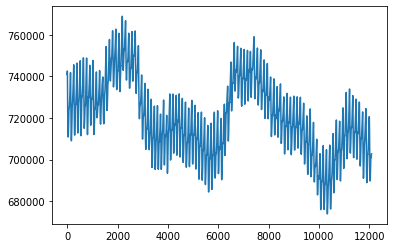

In [5]:
# 16进制转10进制
def hex2num(x: str):
    return [int(a, 16) for a in x.split(',')]


raw_data = np.array(hex2num(hex_data))

# # 可视化原始数据
plt.plot(raw_data)

2. 定位谷底

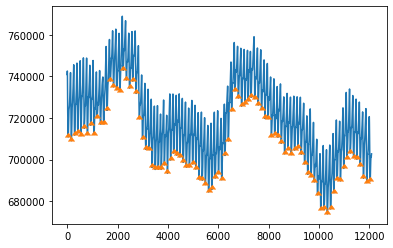

In [6]:
trough_locs = jingluo.find_troughs(raw_data, visualize=True)

3. 计算幅值、相位
    - 可视化所有周期幅值、相位
    - 计算均值

In [7]:
# 可视化
amps, phases = jingluo.compute(raw_data, trough_locs)
pd.DataFrame(amps) # 幅值

,0,1,2,3,4,5,6,7
0,725105.409449,11715.975875,6585.703465,1794.386440,1176.124401,436.605825,139.547313,192.044728
1,726385.143939,14064.930679,6486.016459,1244.897616,1358.547598,594.634041,275.181966,30.726374
2,727188.742188,12711.206062,6809.614960,1422.454053,1258.522417,646.041262,351.524936,94.990652
3,729351.909836,13257.071966,7206.042844,2208.001088,993.715185,503.194067,116.851432,194.388467
4,730366.992424,13280.080165,7068.731196,1154.969247,1130.804470,669.808868,204.774264,199.723763
...,...,...,...,...,...,...,...,...
88,714010.124031,9654.725439,6441.840945,1767.373142,1018.261112,450.552544,76.486274,103.585981
89,712442.828358,10006.473035,6675.545550,1683.181004,1315.743279,354.088972,175.256463,272.750903
90,709348.614173,9869.035407,6373.329622,2122.577827,1214.393135,535.115397,198.239115,351.496868
91,707581.701493,13568.595379,6579.851353,1764.335671,1243.147612,414.272717,64.400459,238.436099


In [8]:
pd.DataFrame(phases) # 相位

,0,1,2,3,4,5,6,7
0,-2.401922e-17,2.516155,-2.867407,-1.817579,-0.388279,0.459998,3.120900,-2.083945
1,0.000000e+00,2.578906,-2.786210,-0.830336,0.479931,1.556373,2.873993,-1.907860
2,0.000000e+00,2.566643,-2.602791,-0.646768,0.802692,1.825019,-3.066127,-0.969022
3,0.000000e+00,2.509255,-2.926747,-2.024219,-0.416219,0.280917,0.401590,-1.529529
4,0.000000e+00,2.514367,-2.947379,-2.059125,0.611881,1.092444,2.409081,-1.899498
...,...,...,...,...,...,...,...,...
88,0.000000e+00,2.366785,-3.031369,-2.346540,-0.751241,-0.076333,0.631116,-2.657803
89,0.000000e+00,2.586444,-2.823086,-1.815186,-0.426957,0.104832,-2.356937,-1.630859
90,8.399628e-18,2.628455,-2.900969,-2.156079,-0.879641,-0.624481,-1.651855,-1.795178
91,0.000000e+00,2.557523,-3.008821,-2.036931,-0.641164,-0.099110,2.561406,-2.405596


In [9]:
# 计算均值
amp_means = np.mean(amps, axis=0)  # 幅值平均
phase_means = np.mean(phases, axis=0)  # 相位平均
pd.DataFrame([amp_means, phase_means], index=['幅值', '相位'])

,0,1,2,3,4,5,6,7
幅值,7.201913e+05,10569.054072,6188.111958,1625.939232,1040.580089,444.935605,252.155275,211.597040
相位,-2.465581e-18,2.468605,-1.845946,-1.664978,-0.477050,0.339958,0.116115,-0.615285


4. 拟合
    - 获取标准值，或手动输入标准值
    - 根据某种拟合方式拟合（目前为平方差的和）

In [10]:
# 使用现有标准值
standard_amp_ratios, standard_phases = jingluo.get_standards()

# 手动输入标准值
# standard_amp_ratios = []
# standard_phases = []

pd.DataFrame([standard_amp_ratios, standard_phases], index=['标准幅值比例', '标准相位'])

,0,1,2,3,4,5,6,7
标准幅值比例,1.0,1.0000,0.425634,0.304279,0.175414,0.125638,0.087581,0.057274
标准相位,0.0,2.0413,2.805500,3.044500,-2.274400,-1.620000,-1.483300,-0.221300


In [11]:
# 仅拟合幅值，且忽略心包经
amp_means = amp_means[1:]
standard_amp_ratios = standard_amp_ratios[1:]
matched_amps = jingluo.match(amp_means, standard_amp_ratios)

5. 对比并输出结果

In [12]:
# 我们的结果
amp_diff = jingluo.compare(matched_amps, standard_amp_ratios)
amp_diff = [0] + amp_diff # 忽略心包经
phase_diff = jingluo.compare(phase_means, standard_phases)

# 金姆的结果
jinmu = df.iloc[index, 3: 11]

pd.DataFrame([amp_diff, phase_diff, jinmu], index=['幅值差异%', '相位差异%', '金姆%'])

/Users/xiaoleiwang/dev/yijyun-jupyter/jingluo.py:77: RuntimeWarning: divide by zero encountered in true_divide
  return list((x - standards) * 100 / standards)  # 默认心包经差异为0


,0,1,2,3,4,5,6,7
幅值差异%,0.0,16.649459,60.460794,-41.023583,-34.527805,-60.913978,-68.223482,-59.224280
相位差异%,-inf,20.932997,-165.797414,-154.688075,-79.025253,-120.985065,-107.828120,178.031908
金姆%,-5.0,6.000000,47.000000,-64.000000,25.000000,-35.000000,-44.000000,10.000000
